#### Example of Tree

| | |
| -- | -- |
| 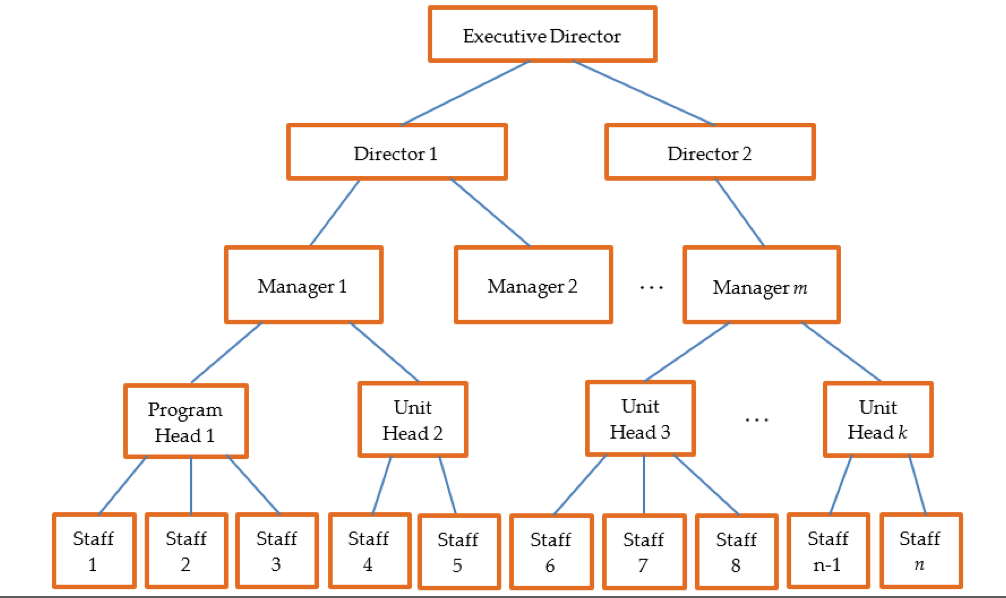 | 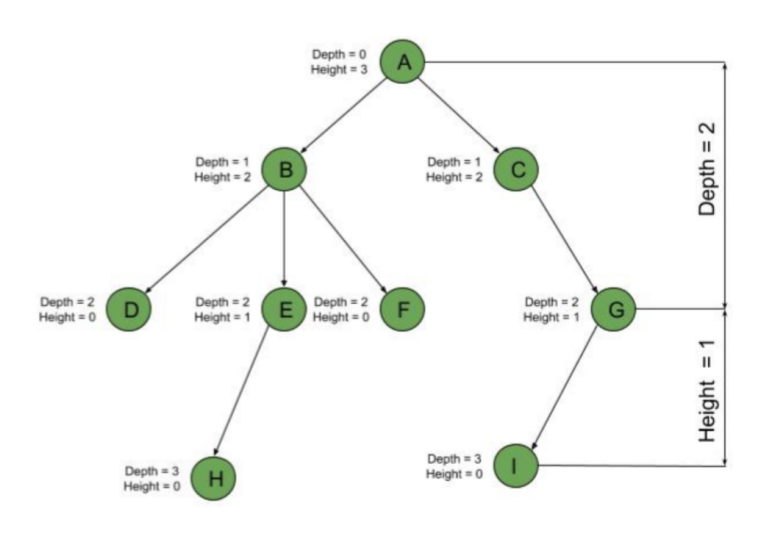 |
 
If the tree $T $is nonempty, there is a root node does not have a parent. Each node in the tree $T$ other than the root has a unique parent node; a node with a parent is called a child of this parent.

For position `p`,

| Operation | Description |
| -- | -- |
| `p.element()` | Obtain the element at `p`. |

For tree `myT`,

| Operation | Description |
| -- | -- |
| `myT.size()` | Obtain the number of elements (positions) in `myT`. |
| `myT.isEmpty()` | Return `True` if `myT` is empty and `False` otherwise. |
| `myT.positions()` | Generate an iteration of all positions in `myT`. |
| `iter(myT)` | Generate an iteration of all elements in `myT`. |
| `myT.root()` | Obtain the root position in `myT` or None if `myT` is empty. |
| `myT.is_root(p)` | Return `True` if `p` is the root of `myT` and `False` otherwise. |
| `myT.parent(p)` | Obtain the parent position of `p` or `None` if `p` is the root of `myT`. |
| `myT.num_children(p)` | Obtain the number of children of `p` in `myT`. |
| `myT.children(p)` | Generate an iteration of all children of `p`. |
| `myT.is_leaf(p)` | Return `True` if `p` is a leaf of `myT` and `False` otherwise. |

### Binary Tree (ADT)

A binary tree is a special tree data structure that is an ordered tree with the properties listed as follows:

1. Every node in the tree has at most two children.
2. Each child node is called either a left child or a right child.
3. In the order of children of a node, a left child precedes a right child.
4. If _all nodes in a binary tree either have two or zero children, the tree is **proper or full**_. Otherwise, the tree is improper.

- Height of a tree is the max number of ancestors of any node in the tree.
- Depth of a node is the number of ancestors that it has, excluding itself.
- Degree of a node is the number of children that a node has.

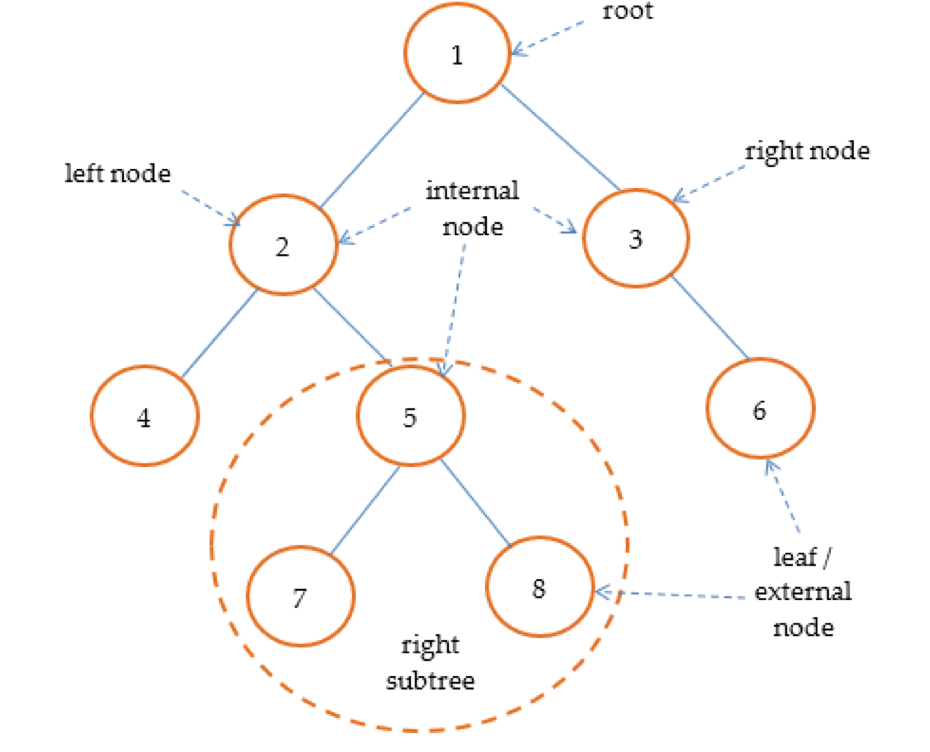

Given a node in the tree, its left subtree is a subtree that is rooted at the left child of the node, while the right subtree is a subtree that is rooted at the right child of the node. Therefore, we can recursively define a binary tree $T$ such that it is either empty or consists of:

- A root of $T$
- The left subtree of $T$ (may be empty)
- The right subtree of $T$ (may be empty)

Additional methods of `myT` for binary tree,

| Operation | Description |
| -- | -- |
| `myT.left(p)`	| Return the position of the left child of `p` or `None` if `p` does not have a left child. |
| `myT.right(p)` | Return the position of the right child of `p` or `None` if `p` does not have a right child. |
| `myT.sibiling(p)` | Return the position of the sibling of `p` or `None` if `p` does not have any sibling. |

Given definitions,

- $T$: A nonempty binary tree
- $H$: The height of $T$
- $N$: The total number of nodes in $T$
- $N_E$: The number of external nodes in $T$
- $N_I$: the number of internal nodes in $T$

The properties are as follows:

- $H + 1 \leq N < 2^{H+1} - 1$
- $\text{log}(N + 1) - 1 < H < N - 1$
- $1 < N_E < 2^H$
- $H < N_I < 2^H - 1$
- $\text{log}(N + 1) - 1 < H < N - 1$

If the tree is proper, then:

- $2H + 1 \leq N < 2^{H+1} - 1$
- $\text{log}(N + 1) - 1 < H < \frac{N - 1}{2}$
- $H + 1 < N_E < 2^H$
- $H < N_I < 2^H - 1
- $N_E = N_I + 1$

#### Types

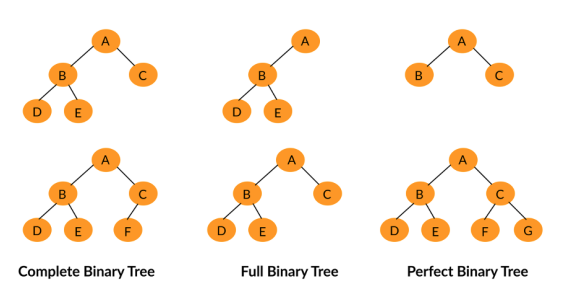

- **Complete Tree**: Every level is completely filled except the last (leaf) and all nodes are as far left as possible
- **Full Binary Tree**: Every node has two child nodes except leaf
- **Perfect Binary Tree**: Every node has two child nodes except leaf and all leaves on same level

Implementation of binary tree ADT,

In [1]:
class TreeNode: 
    
    def __init__(self, val, left=None, right=None): 
        self.val = val
        self.left = None
        self.right = None 
    
    def getVal(self):
        return self.val
    
    def setVal(self, val):
        self.val = val
    
    def insertLeft(self, n):
        self.left = n
    
    def insertLeftVal(self, val):
        if (self.left == None): 
            self.left = TreeNode(val)
        else:
            t = TreeNode(val)
            t.left = self.left # not restricted by binary tree
            self.left = t

    def insertRight(self, n):
        self.right = n
            
    def insertRightVal(self, val):
        if (self.right == None): 
            self.right = TreeNode(val)
        else:
            t = TreeNode(val)
            t.right = self.right # not restricted by binary tree
            self.right = t
            
    def getLeft(self):
        return self.left 
    
    def getRight(self):
        return self.right

In [2]:
n1 = TreeNode("1") # root
n1.insertLeftVal("2")
n1.insertRightVal("3")
n2 = n1.getLeft()
n2.insertLeftVal("4")
n2.insertRightVal("5")
n5 = n2.getRight()
n5.insertLeftVal("7")
n5.insertRightVal("8")
n3 = n1.getRight()
n3.insertRightVal("6")

### Traversals (DFS)

| Pre-order | In-order | Post-order |
| -- | -- | -- |
| 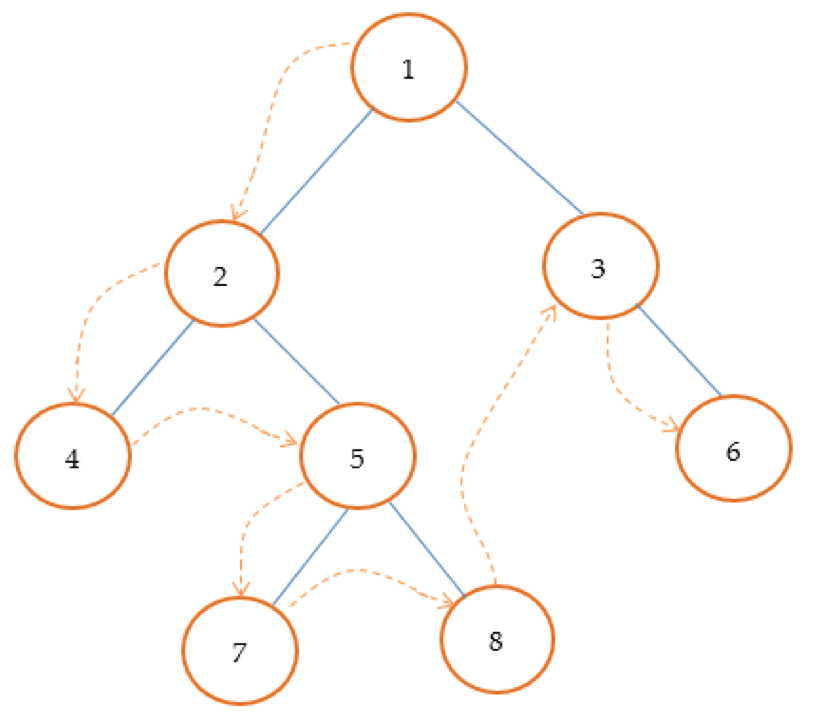 | 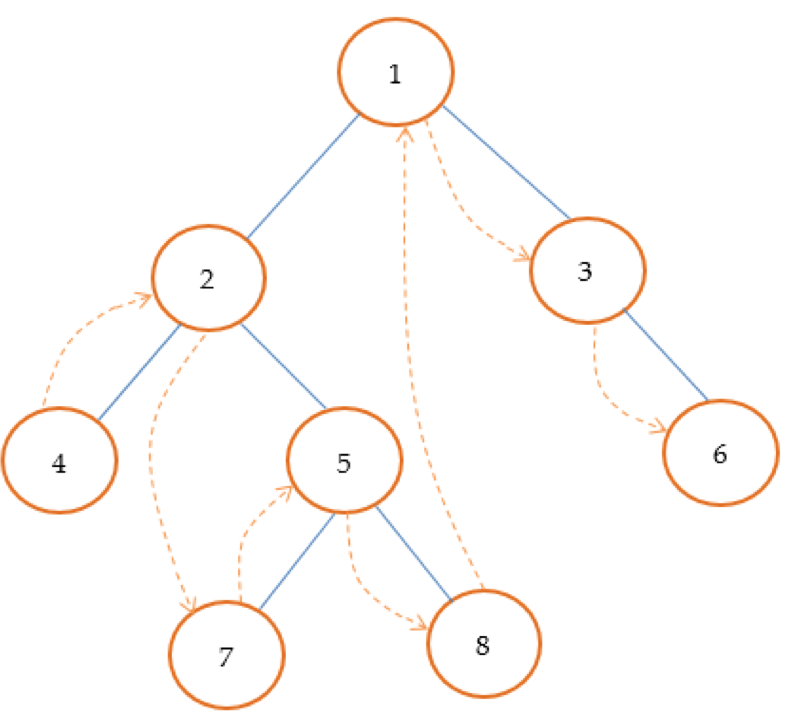 | 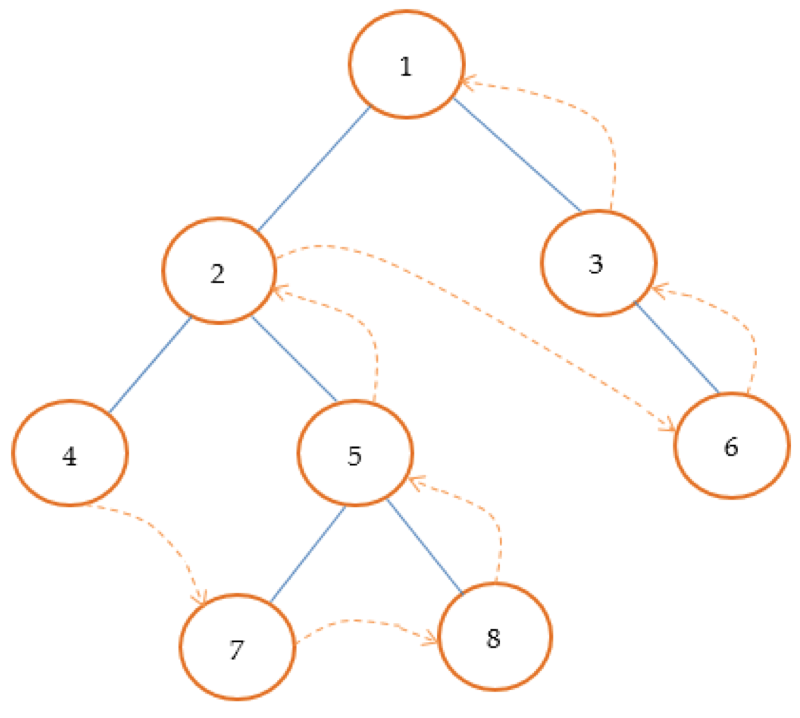 |

The time complexity of preorder traversal, inorder traversal and postorder traversal is $O(n)$.

#### Traversing pre-order

_**Logic is as follows**_:

1. If the root is empty, stop.
2. Visit the root.
3. Recursively execute preorder on all subtrees rooted at the children of the root from left to right

_**Based on the above diagram example**_,

1. Visit 1.
2.  Execute preorder on the left subtree rooted at 2 (1’s left child).
    1. Visit 2
    2. Execute preorder on the left subtree rooted at 4 (2’s left child).
        1. Visit 4
    3. Execute preorder on the right subtree rooted at 5 (2’s right child).
        1. Visit 5
        2. Execute preorder on the left subtree rooted at 7 (5’s left child).
            1. Visit 7
        3. Execute preorder on the right subtree rooted at 8 (5’s right child)
            1. Visit 8

3. Execute preorder on the right subtree rooted at 3 (1’s right child).
    1. Visit 3
        1. Execute preorder on the right subtree rooted at 6 (3’s right child).
            1. Visit 6
4. The overall order of visits is 1, 2, 4, 5, 7, 8, 3, 6.

In [3]:
def traverse_preorder(root):
    if not root: 
        return

    yield root.getVal()

    for d in traverse_preorder(root.getLeft()):
        yield d

    for d in traverse_preorder(root.getRight()):
        yield d 

list(traverse_preorder(n1))

['1', '2', '4', '5', '7', '8', '3', '6']

#### Traversing in-order

_**Logic is as follows**_:

1. If the root is empty, stop.
2. Recursively execute inorder on the left subtree rooted at the left child of the root.
3. Visit the root.
4. Recursively execute inorder on the right subtree rooted at the right child of the root.

_**Based on the above diagram example**_,

1. Execute inorder on the left subtree rooted at 2 (1’s left child).
    1. Execute inorder on the left subtree rooted at 4 (2’s left child).
        1. Visit 4
    2. Visit 2
    3. Execute inorder on the right subtree rooted at 5 (2’s right child).
        1. Execute inorder on the left subtree rooted at 7 (5’s left child).
            1. Visit 7
        2. Visit 5
        3. Execute inorder on the right subtree rooted at 8 (5’s right child)
            1. Visit 8
2. Visit 1
3. Execute inorder on the right subtree rooted at 3 (1’s right child).
    1. Visit 3
    2. Execute inorder on the right subtree rooted at 6 (3’s right child).
        1. Visit 6
4. The overall order of visits is 4, 2, 7, 5, 8, 1, 3, 6.

Think of left – root –right.

In [12]:
def traverse_inorder(root):
    if not root: 
        return

    for d in traverse_inorder(root.getLeft()):
        yield d

    yield root.getVal()

    for d in traverse_inorder(root.getRight()):
        yield d 

list(traverse_inorder(n1))

['4', '2', '7', '5', '8', '1', '3', '6']

#### Traversing post-order

_**Logic is as follows**_:

1. If the root is empty, stop.
2. Recursively execute postorder on all subtrees rooted at the children of the root from left to right.
3. Visit the root.

_**Based on the above diagram example**_,

1. Execute preorder on the left subtree rooted at 2 (1’s left child).
    1. Execute preorder on the left subtree rooted at 4 (2’s left child).
        1. Visit 4
    2. Execute preorder on the right subtree rooted at 5 (2’s right child).
        1. Execute preorder on the left subtree rooted at 7 (5’s left child).
            1. Visit 7
        2. Execute preorder on the right subtree rooted at 8 (5’s right child)
            1. Visit 8
        3. Visit 5
    3. Visit 2
2. Execute preorder on the right subtree rooted at 3 (1’s right child).
    1. Execute preorder on the right subtree rooted at 6 (3’s right child).
        1. Visit 6
    2. Visit 3
3. Visit 1
4. The overall order of visits is 4, 7, 8, 5, 2, 6, 3, 1.

In [13]:
def traverse_postorder(root):
    if not root: 
        return 

    for d in traverse_postorder(root.getLeft()):
        yield d

    for d in traverse_postorder(root.getRight()):
        yield d

    yield root.getVal()
    
list(traverse_postorder(n1))

['4', '7', '8', '5', '2', '6', '3', '1']

### Traversals (BFS)

#### Traversing Level-Order

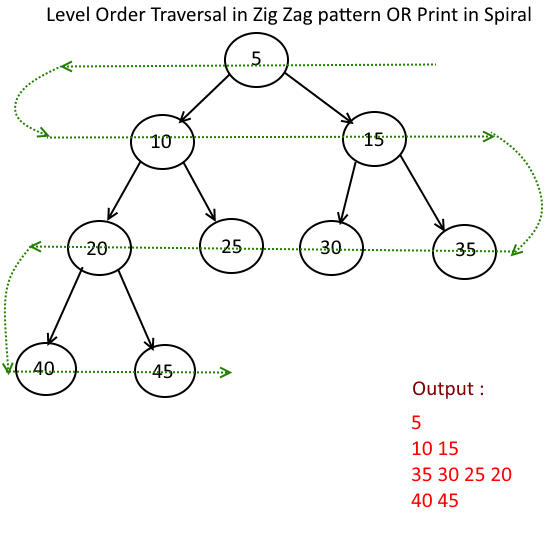

In [14]:
def traverse_levelorder(root, reverse=False):
    result = []

    if not root:
        return

    q = []
    q.append(root)

    while q: 
        level_size = len(q)
        current_level = []

        for _ in range(level_size):
            current_node = q.pop(0)
            current_level.append(current_node.val)  # add node to current level
            
            if current_node.getLeft():
                q.append(current_node.getLeft())
            
            if current_node.getRight():
                q.append(current_node.getRight())
        
        if reverse: 
            result = current_level + result # bottom first 
        else: 
            result = result + current_level                  
    
    return result

list(traverse_levelorder(n1)), list(traverse_levelorder(n1, True))

(['1', '2', '3', '4', '5', '6', '7', '8'],
 ['7', '8', '4', '5', '6', '2', '3', '1'])

Counting the maximum depth of the tree,

In [17]:
def max_depth(root):
    if root is None:
        return 0

    height_left = max_depth(root.getLeft())
    height_right = max_depth(root.getRight())
    return max(height_left, height_right) + 1
    
max_depth(n1)

4

Counting the minimum depth of the tree,

In [21]:
def min_depth(root: TreeNode) -> int:
    if root is None:
        return 0

    height_left = min_depth(root.getLeft())
    height_right = min_depth(root.getRight())
    return min(height_left, height_right) + 1

min_depth(n1)

2

### Searching

In [1]:
arr = sorted([1, 2, 3, 4, 15, 16, 77])

#### Linear search

The time complexity is $O(n)$ to search for a target,

In [2]:
def linear_search(nums, target):
    for idx in range(len(nums)): 
        if target == nums[idx]:
            return idx 
    return -1 

%timeit -n 1 -r 1 print(15, linear_search(arr, 15))
%timeit -n 1 -r 1 print(77, linear_search(arr, 77))
%timeit -n 1 -r 1 print(11, linear_search(arr, 11))

15 4
4.91 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
77 6
138 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11 -1
964 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Binary search

([See more](https://www.topcoder.com/thrive/articles/Binary%20Search))

The time complexity is $O(\text{log}(n))$. 

**Types** are:

- Contains
- First occurrence of a key
- Last occurrence of a key
- Least element greater than
- Greatest element less than
- Closest element

Here's an example to find the first occurrence of the target,

In [3]:
def binary_search(nums, target):
    ans = -1 
    l, r = 0, len(nums) - 1

    while l <= r: 
        m = l + (r-l)//2 
        
        if (nums[m] == target):
            ans = m 
            r = m - 1

        elif (nums[m] < target):
            l = m + 1 
        
        else:
            r = m - 1
    
    return ans

%timeit -n 1 -r 1 print(15, binary_search(arr, 15))
%timeit -n 1 -r 1 print(77, binary_search(arr, 77))
%timeit -n 1 -r 1 print(11, binary_search(arr, 11))

15 4
155 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
77 6
2.31 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11 -1
158 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Two Pointers

In problems where we deal with sorted arrays (or LinkedLists) and need to find a set of elements that fulfill
certain constraints. The set of elements could be a pair, a triplet or even a subarray.

| Idea | Two Sum Example | Reverse String Example | 
| -- | -- | -- |
| 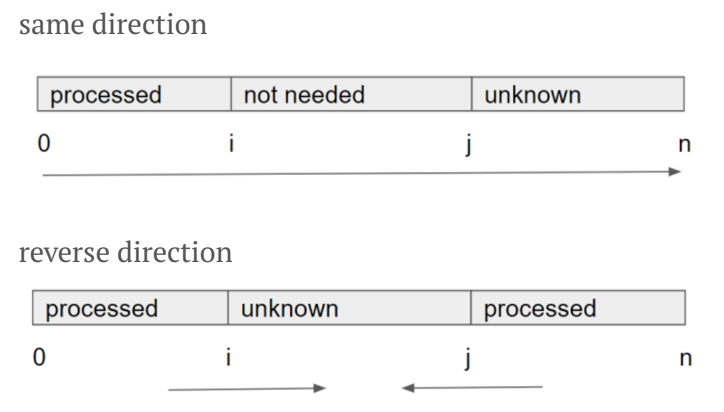 | 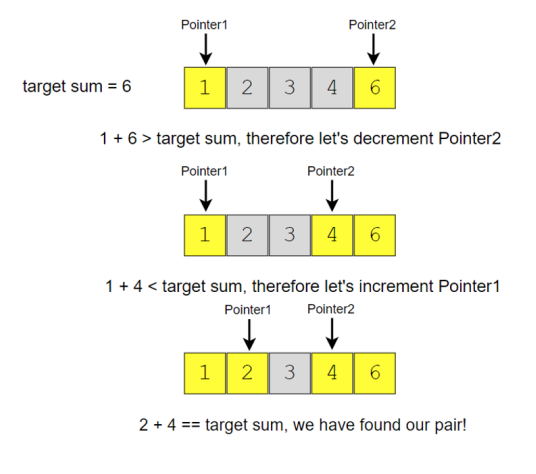 | 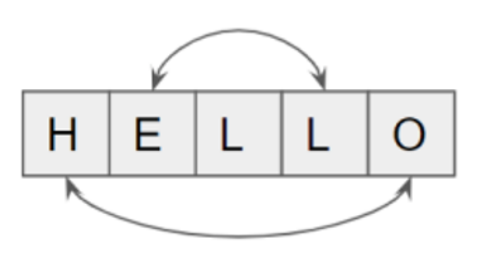 |

Examples where two-pointers are useful are:
- Two sum solution that seeks to find a pair in the array whose sum is equal to the given target.
- Reversal of string

In [8]:
arr = [66, 3, 1, 25, 3, 46, 15, 6, 16, 77]

Implementation of two-sums with time complexity of $O(n^2)$ by looping,

In [21]:
def two_sums(nums, target):
    l = len(nums)
    for i in range(l):
        for j in range(i + 1, l):
            if nums[i] + nums[j] == target:
                return i, j
    return None

%timeit -n 1 -r 1 print(6, two_sums(arr, 6))

6 (1, 4)
259 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Implementation of two-sums with time complexity of $O(n)$ by using the approach similar to binary search,

> Given that the sorting complexity gives $O(\text{log}(n))$, and the function complexity is $O(n)$, this gives $O(\text{log}(n)) + O(n)$ which leads to $O(n)$.

In [22]:
def two_sums(nums, target):
    ivs = enumerate(nums)
    ivs = sorted(ivs, key = lambda x:x[1]) 

    l = 0
    r = len(ivs) - 1

    while l < r:
        if ivs[l][1] + ivs[r][1] == target:
            return ivs[l][0], ivs[r][0]
        elif ivs[l][1] + ivs[r][1] < target:
              l += 1
        else:
              r -= 1 

%timeit -n 1 -r 1 print(6, two_sums(arr, 6))

6 (1, 4)
293 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Implementation of two-sums with time complexity of $O(n)$ by hashing _(dictionary to store the candidates, key is the number, value is the index)_,

In [25]:
def two_sums(nums, target):
    _dict = {}

    for i in range(len(nums)):
        c = target - nums[i]
        if (c in _dict):
            return _dict[c], i 
        else:
            # store it to dictionary 
            _dict[nums[i]] = i

%timeit -n 1 -r 1 print(6, two_sums(arr, 6))

6 (1, 4)
503 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Implementation of string reverse,

_This does not allocate extra space for another array, by modifying the input array in-place with $O(1)$ extra memory._

In [27]:
def reverse_inplace(arr_):  
    i, j = 0, len(arr_) - 1
    
    while i < j: 
        arr_[i], arr_[j] = arr_[j], arr_[i]
        i += 1
        j -= 1
    return arr_

%timeit -n 1 -r 1 print(reverse_inplace(['H', "E", "L", "L", "O"]))

['O', 'L', 'L', 'E', 'H']
547 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Fast & Slow Pointers (known as Hare & Tortoise algorithm)

A pointer algorithm that uses two pointers which move through the array (or sequence/LinkedList) at different speeds.

For example, given the head of a Singly LinkedList, write a function to determine if the LinkedList has a cycle in it or not.

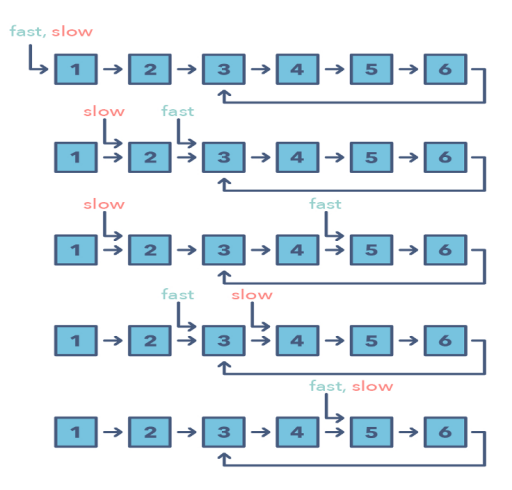

In [28]:
class ListNode: 
    
    def __init__(self, data=None, nxt=None): 
        self.data = data 
        self.next = nxt


def has_cycle(head): 
    s, f = head, head
    while f and f.next: 
        f = f.next.next
        s = s.next 
        if s == f:
            return True 
    return False 

head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)
head.next.next.next.next.next = ListNode(6)

# 1 → 2 → 3 → 4 → 5 → 6 
print("linked list has cycle: ", has_cycle(head))

# 1 → 2 → 3 → 4 → 5 → 6 → 3 
head.next.next.next.next.next.next = head.next.next # 6 -> 3 
print("linked list has cycle: ", has_cycle(head))

linked list has cycle:  False
linked list has cycle:  True


#### Sliding Window

In many problems dealing with an array (or a LinkedList), we are asked to find or calculate something among
all the contiguous subarrays (or sublists) of a given size.

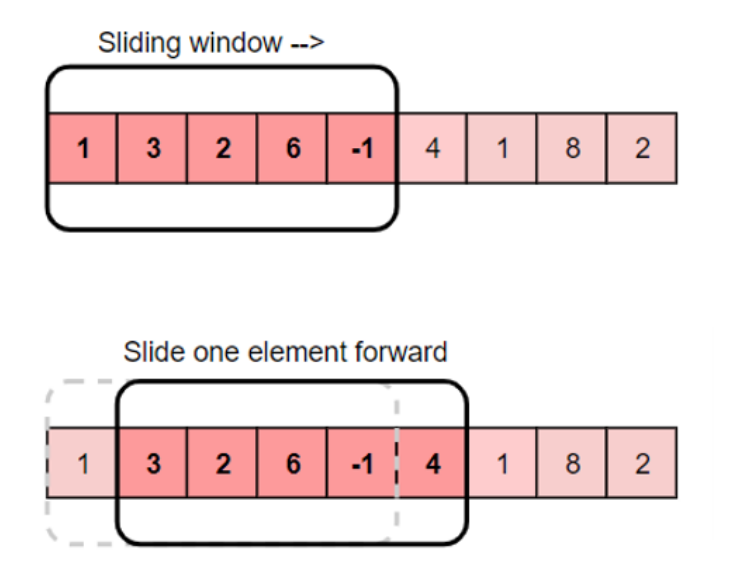

For example, given a string, find the length of the longest substring which has no repeating characters.

| Input | Output | Explanation |
| -- | -- | -- |
| `"aabccbb“` | `3` | The longest substring without any repeating characters is `"abc"` |
| `"abbbb“` | `2` | The longest substring without any repeating characters is `"ab"` |
| `"abccde“` | `3` | The longest substrings without any repeating characters are `"abc"` & `"cde"` |

In [34]:
def find_max_substr(s):
    win_start = 0
    max_substr = 0 
    
    for i, x in enumerate(s): 
        window = s[win_start:i]
        
        if x in window: 
            x_idx = window.index(x)
            win_start = win_start + x_idx + 1

        max_substr = max(i - win_start + 1, max_substr)

    return max_substr 

%timeit -n 1 -r 1 print(find_max_substr("aabbcdefbab"))

6
401 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Example case of obtaining moving average for window of `5`. 

Implementing using the brute-force method which gives the time complexity of $O(n * k)$,

In [29]:
arr = [1, 3, 2, 6, -1, 4, 1, 8, 2]

In [33]:
# brute-force O(N*K)
def find_averages(K, arr):
    result = []
    for i in range(len(arr) - K + 1):
        _sum = 0.0
        
        for j in range(i, i + K):
            _sum += arr[j]
        
        result.append(_sum / K)

    return result

%timeit -n 1 -r 1 print(find_averages(5, arr))

[2.2, 2.8, 2.4, 3.6, 2.8]
2.97 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


For example, using the sliding window method which gives the time complexity of $O(n)$,

In [32]:
def find_averages_sliding_window(K, arr):
    result = []
    windowSum, windowStart = 0.0, 0
    
    for windowEnd in range(len(arr)):
        windowSum += arr[windowEnd]
        
        if windowEnd >= K - 1:
            result.append(windowSum / K)
            windowSum -= arr[windowStart]
            windowStart += 1

    return result

%timeit -n 1 -r 1 print(find_averages_sliding_window(5, arr))

[2.2, 2.8, 2.4, 3.6, 2.8]
410 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Summary

#### Array

- **Concept:**
    1. Consecutive memory space: `arr[i].address = base_address + i * data_type_size`
    2. Same data type → same size for each element
    3. Fixed length

- **Complexity:**
    1. Accessing: $O(1)$
    2. Searching: $O(n)$

- **Notes:**
    1. Not memory friendly
    2. cpu cacheable
    3. index from `0`
    4. Fundamental data structure to implement others such as stack, queue, heap
    5. Data type (programming language) vs. data structure

- **Hands-on:**
    1. dynamic array
    2. stack/queue
    3. binary search
    
#### Stack

- **Concept:**
    1. LIFO (Last In First Out) / FILO (First In Last Out)
- **Complexity:**
    1. Accessing: $O(n)$
    2. Searching: $O(n)$
    3. Inserting/push: $O(1)$
    4. Deleting/pop: $O(1)$
- **Notes:**
    1. Stack implementation by dynamic array or linked list
- **Hands-on:**
    1. Function call stack
    2. Expression matching
    
#### Queue

- **Concept:**
    1. FIFO/LILO
- **Complexity:**
    1. Accessing: $O(n)$
    2. Searching: $O(n)$
    3. Inserting/enqueue: $O(1)$
    4. Deleting/dequeue: $O(1)$
- **Notes:**
    1. Queue implementation by dynamic array or linked list
- **Hands-on:**
    1. Priority queue
    2. circular queue
    3. job queue
    4. resource pool

#### Linked List

- **Concept:**
    1. nonconsecutive memory space
    2. node: data + pointer
    3. Single Linked List, Doubly Linked List, Circular Linked List, Positional Linked List

- **Complexity:**
    1. Accessing: $O(n)$
    2. Searching: $O(n)$
    3. Inserting: $O(1)$
    4. Deleting: $O(1)$

- **Notes:**
    1. accessing slower than array
    2. with/without head/tail node (which don’t store any data)
    3. fundamental data structure to implement others such as skip list, hash table, etc.

- **Hands-on:**
    1. stack
    2. queue
    3. traverse/reverse/update/merge
    4. skip list
    5. hash table

#### Binary Tree

- **Concept:**
    1. one root
    2. max `2` child nodes
    3. height & depth
    4. traversal (DFS/BFS): in-order(left-root-right), pre-order(root-left-right), post-order(left-right-root), level-order
    5. proper, perfect, full, complete binary tree

- **Complexity:**

    1. DFS: time $O(n)$, space $O(h)$
    2. BFS: time $O(n)$, space $O(n)$
- **Notes:**
    1. stored in array or linked nodes
- **Hands-on:**
    1. traversal